In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mean_consume import mean_consume
from correlation_graph import correlation_graph

In [2]:
car = pd.read_csv('data/measurements_clean.csv')
car.head()

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
0,28.0,5.0,26,0,21.5,12,0,1,0,0,0,45.0,E10,62.1,6.900
1,12.0,4.2,30,0,21.5,13,0,1,0,0,0,NaN,NaN,NaN,5.796
2,11.2,5.5,38,0,21.5,15,0,1,0,0,0,NaN,NaN,NaN,7.590
3,12.9,3.9,36,0,21.5,14,0,1,0,0,0,NaN,NaN,NaN,5.382
4,18.5,4.5,46,0,21.5,15,0,1,0,0,0,NaN,NaN,NaN,6.210


## Análisis de datos

Con nuestro dataset limpio y ordenado, es hora de analizar qué nos dicen nuestros datos. Con estos en la mano, y leyendo el problema presentado por la empresa, considero que el objetivo principal debe ser la variable del consumo.

Lo primero de todo, me gutaría realizar un análisis algo más intuitivo sobre como el consumo se ve afectado por distintos factores, diferenciando siempre entre ambos tipos de gasolina.

### Consumo medio general por tipo de gasolina

Antes me gustaría saber, por lo general, con qué gasolina consume más el coche.

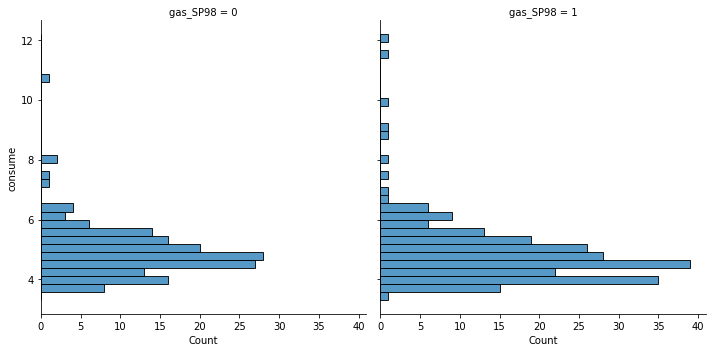

In [3]:
sns.displot(car, y='consume', col='gas_SP98');

In [4]:
m_consume_gas = {'SP95': [car[car.gas_SP98 == 0]['consume'].mean()],
                 'SP95_price': [car[car.gas_SP98 == 0]['trip_price'].mean()],
                 'SP98': [car[car.gas_SP98 == 1]['consume'].mean()],
                 'SP98_price': [car[car.gas_SP98 == 1]['trip_price'].mean()]}

pd.DataFrame(m_consume_gas)

,SP95,SP95_price,SP98,SP98_price
0,4.93125,6.805125,4.899123,7.152719


Como muestra la tabla, por lo general, los consumos son más altos para la gasolina SP95, pero la diferencia en precio es de casi 0.35 céntimos más barata con respecto a la SP98.

### Distancia

Consumo dependiendo de la distancia recorrida por cada tipo de gasolina.

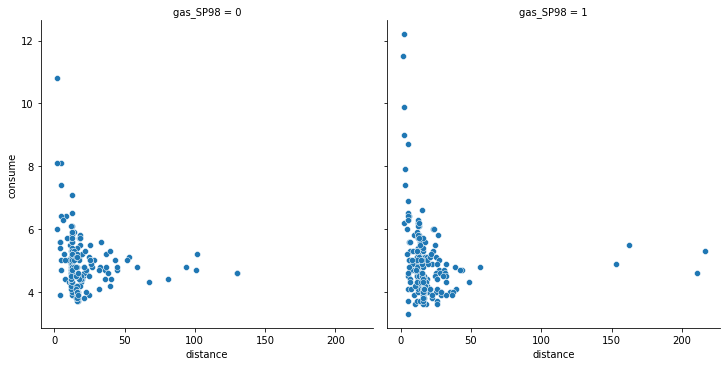

In [5]:
sns.relplot(data=car, x='distance', y='consume', col='gas_SP98', kind='scatter');

In [6]:
car[(car.distance < 25) & (car.consume > 7.5)]

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
45,2.0,9.9,21,1,21.5,4,0,1,0,0,0,NaN,NaN,NaN,14.453999
60,2.9,7.9,18,1,21.5,9,1,0,1,0,0,NaN,NaN,NaN,11.534000
61,2.1,12.2,23,1,21.5,9,1,1,0,0,0,NaN,NaN,NaN,17.812000
112,5.1,8.7,21,1,23.5,5,0,1,0,0,0,NaN,NaN,NaN,12.702000
147,1.7,10.8,14,0,21.5,10,0,0,1,0,0,NaN,NaN,NaN,14.904000
160,5.1,8.1,39,0,21.5,4,0,1,0,0,0,NaN,NaN,NaN,11.178001
206,2.4,9.0,26,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,13.140000
210,1.3,11.5,21,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,16.790000
254,2.0,8.1,20,0,22.5,14,0,1,0,0,0,NaN,NaN,NaN,11.178001


No se aprecian grandes diferencias de consumos entre un tipo de gasolina u otro. Si hay una variación significativa entre consumos en trayectos cortos para ambos casos, ya que para trayectos de entre 0 y 50 kilómetros se registran consumos de entre menos de 4 litros y más de 10 o incluso 12 litros a los 100.

Revisando estos casos en detalle vemos que la velocidad no supera los 40 km/h de media y las temperaturas exteriores tienden a ser más bien bajas, por lo que podemos inferir que en trayectos cortos, donde la velocidad media y la temperatura vayan a ser bajas el consumo se disparará con cualquier tipo de gasolina.

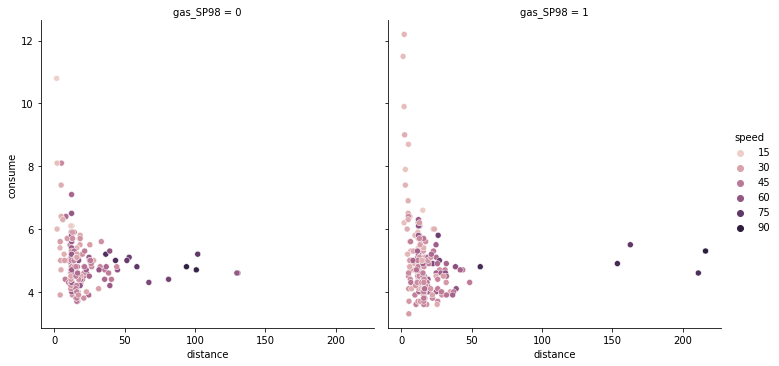

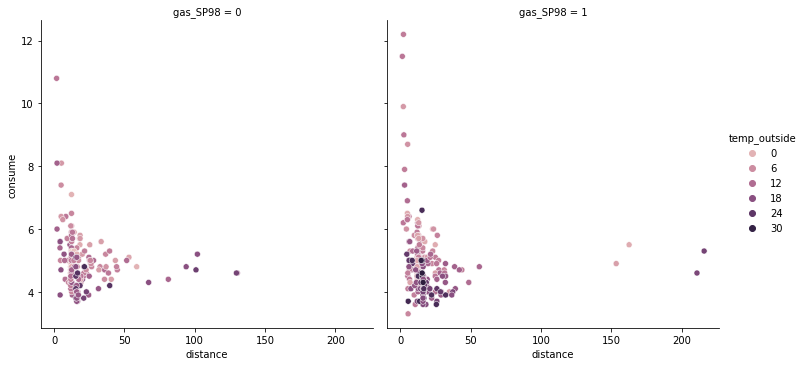

In [7]:
sns.relplot(data=car, x='distance', y='consume', hue='speed', col='gas_SP98', kind='scatter')
sns.relplot(data=car, x='distance', y='consume', hue='temp_outside', col='gas_SP98', kind='scatter');

Además, no se aprecia una clara relación lineal entre distancia y consumo.

### Velocidad

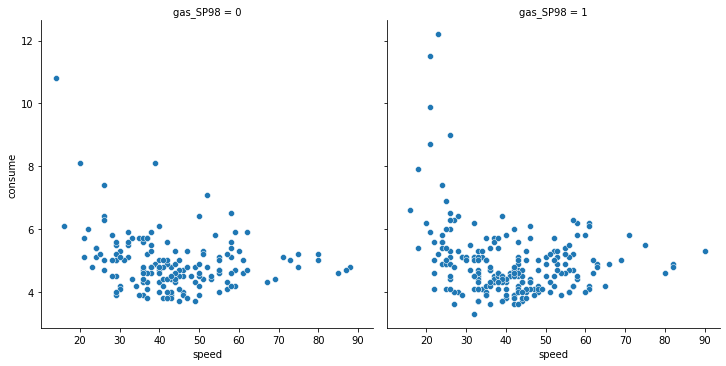

In [8]:
sns.relplot(data=car, x='speed', y='consume', col='gas_SP98', kind='scatter');

In [9]:
car[(car.speed <= 30) & (car.consume > 7)]

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
37,4.9,7.4,26,0,21.5,6,0,1,0,0,0,NaN,NaN,NaN,10.212000
45,2.0,9.9,21,1,21.5,4,0,1,0,0,0,NaN,NaN,NaN,14.453999
60,2.9,7.9,18,1,21.5,9,1,0,1,0,0,NaN,NaN,NaN,11.534000
61,2.1,12.2,23,1,21.5,9,1,1,0,0,0,NaN,NaN,NaN,17.812000
112,5.1,8.7,21,1,23.5,5,0,1,0,0,0,NaN,NaN,NaN,12.702000
147,1.7,10.8,14,0,21.5,10,0,0,1,0,0,NaN,NaN,NaN,14.904000
198,2.9,7.4,24,1,21.5,14,0,1,0,0,0,NaN,NaN,NaN,10.804000
206,2.4,9.0,26,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,13.140000
210,1.3,11.5,21,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,16.790000
254,2.0,8.1,20,0,22.5,14,0,1,0,0,0,NaN,NaN,NaN,11.178001


Tampoco hay grandes diferencias en la distribución para este caso. 

Trayectos con velocidades inferiores a 30 km/h registran consumos de entre 4 y más de 10 litros. Analizando estos datos vemos que esos outliers son de distancias de no más de 5 kilómetros, donde la velocidad no supera los 40 km/h y con temperaturas exteriores de menos de 15 grados. 

Esto refuerza nuestra tesis posterior: trayectos donde la temperatura, la distancia y la velocidad sean bajas dispararán el consumo, con registros similares para cualquiera de los tipos de gasolina.

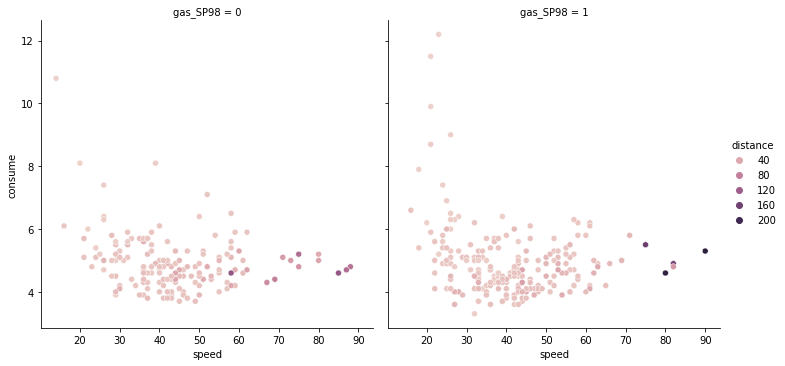

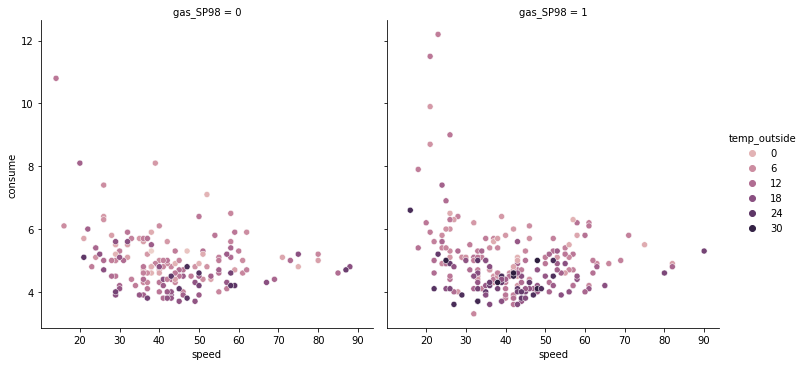

In [10]:
sns.relplot(data=car, x='speed', y='consume', hue='distance', col='gas_SP98', kind='scatter')
sns.relplot(data=car, x='speed', y='consume', hue='temp_outside', col='gas_SP98', kind='scatter');

Para velocidades superiores a 30 los consumos tienden a estabilizarse y no ser superiores a los 8 litros, aunque en algunos trayectos realizados con SP95 parecen ser superiores a los realizados con SP98. 

Se aprecia una leve correlación negativa, por la cual cuanto mayor es la velocidad media, menor es el consumo.

### Temperatura exterior

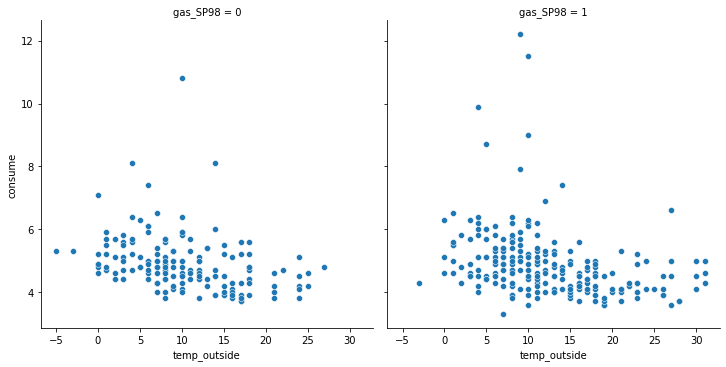

In [11]:
sns.relplot(data=car, x='temp_outside', y='consume', col='gas_SP98', kind='scatter');

In [12]:
car[(car.temp_outside > 0) & (car.temp_outside < 15) & (car.consume > 7)]

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
37,4.9,7.4,26,0,21.5,6,0,1,0,0,0,NaN,NaN,NaN,10.212000
45,2.0,9.9,21,1,21.5,4,0,1,0,0,0,NaN,NaN,NaN,14.453999
60,2.9,7.9,18,1,21.5,9,1,0,1,0,0,NaN,NaN,NaN,11.534000
61,2.1,12.2,23,1,21.5,9,1,1,0,0,0,NaN,NaN,NaN,17.812000
112,5.1,8.7,21,1,23.5,5,0,1,0,0,0,NaN,NaN,NaN,12.702000
147,1.7,10.8,14,0,21.5,10,0,0,1,0,0,NaN,NaN,NaN,14.904000
160,5.1,8.1,39,0,21.5,4,0,1,0,0,0,NaN,NaN,NaN,11.178001
198,2.9,7.4,24,1,21.5,14,0,1,0,0,0,NaN,NaN,NaN,10.804000
206,2.4,9.0,26,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,13.140000
210,1.3,11.5,21,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,16.790000


Distribuciones parecidas para ambos tipos de gasolina, con algunos outliers que, como vemos en el detalle, son practicamente los mismos que en casos anteriores (distancias, velocidades y temperaturas exteriores bajas).

Existe una leve correlación negativa, por la que a mayor temperatura el consumo tiende a ser menor.

### Temperatura Interior

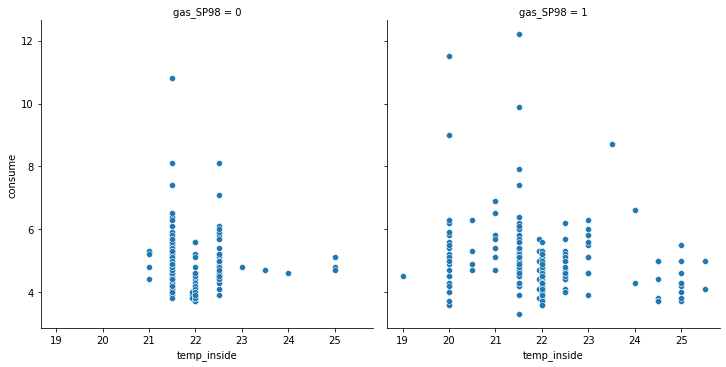

In [13]:
sns.relplot(data=car, x='temp_inside', y='consume', col='gas_SP98', kind='scatter');

Al no registrarse grandes variaciones en la temperatura interior del vehículo (que se mueve en un rango de entre 19 y más o menos 28 grados, lo cual parece indicar que el vehículo suele ser aparcado en garaje cuando no está en uso), parece tratarse de un factor que va a depender bastante de la temperatura exterior.

Pese a ello, la distribuciones son parecidas, salvando que con temperaturas menores a 21 grados no hay datos registrados para la gasolina SP95 (el dueño del dataset especifica que en invierno tan sólo utiliza gasolina SP98, lo cual concuerda con los datos, ya que en invierno es más posible que la temperatura interior sea menor).

Se aprecia además una leve correlación negativa por la cual a mayor temperatura menor es el consumo. Esto va relacionado con la temperatura exterior.

### Aire acondicionado

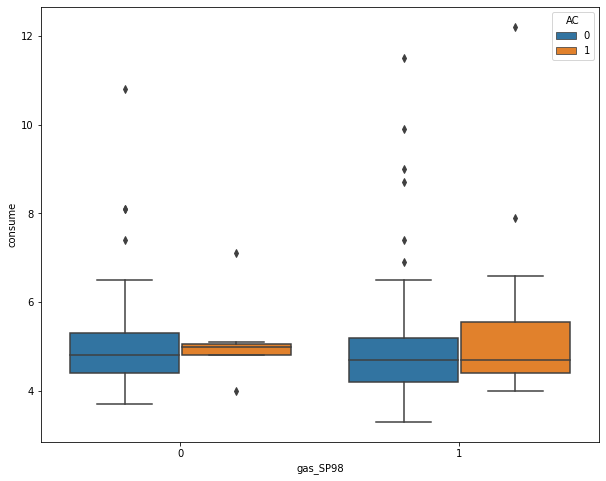

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=car, x='gas_SP98', y='consume', hue='AC', ax=ax);

Para representar la relación entre el aire acondicionado y el tipo de gasolina considero más apropiados los boxplot. 

En este caso podemos apreciar como los consumos son bastante similares cuando el aire acondicionado no está encendido para cualquiera de los dos tipos de gasolina; pero que varían de un tipo a otro cuando esta en funcionamiento, registrando mayores consumos cuando el vehículo funciona con gasolina SP98. 

In [15]:
mean_consume(car, 'AC')

,AC on / SP95,AC on / SP95 price,AC on / SP98,AC on / SP98 price,AC off / SP95,AC off / SP95 price,AC off / SP98,AC off / SP98 price
0,5.11,7.06,5.3,7.74,4.92,6.79,4.85,7.09


Como se puede apreciar, los consumos se disparan cuando el aire acondicionado está encendido (como es lógico), siendo más altos cuando la gasolina utilizada es SP98. Sin embargo, cuando este se apaga, el consumo medio es más bajo con la gasolina SP98. Pese a ello, en este caso el precio sigue siendo más alto, lo que hace que la gasolina SP95 siga siendo más rentable.

En el boxplot se aprecian también varios outliers para todos los casos, cuando los consumos son más o menos iguales o superiores a 6.5.

In [16]:
car[(car.consume > 6.5) & (car.AC == 0)]

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
37,4.9,7.4,26,0,21.5,6,0,1,0,0,0,NaN,NaN,NaN,10.212000
45,2.0,9.9,21,1,21.5,4,0,1,0,0,0,NaN,NaN,NaN,14.453999
103,4.9,6.9,25,1,21.0,12,0,0,1,0,0,NaN,NaN,NaN,10.074000
112,5.1,8.7,21,1,23.5,5,0,1,0,0,0,NaN,NaN,NaN,12.702000
147,1.7,10.8,14,0,21.5,10,0,0,1,0,0,NaN,NaN,NaN,14.904000
160,5.1,8.1,39,0,21.5,4,0,1,0,0,0,NaN,NaN,NaN,11.178001
198,2.9,7.4,24,1,21.5,14,0,1,0,0,0,NaN,NaN,NaN,10.804000
206,2.4,9.0,26,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,13.140000
210,1.3,11.5,21,1,20.0,10,0,1,0,0,0,NaN,NaN,NaN,16.790000
254,2.0,8.1,20,0,22.5,14,0,1,0,0,0,NaN,NaN,NaN,11.178001


Analizando estas anomalías vemos que el consumo se dispara en los casos en los que el aire acondicionado está apagado, las distancias apenas superan los 5 kilómetros, las velocidades no llegan a los 40 km/h y las temperaturas exteriores tienden a ser bajas.

La relación SP98/SP95 es de 6/4 en estos casos, por lo que podemos decir que lo inferido arriba suele cumplirse para ambos casos.

In [17]:
car[(car.consume > 6.5) & (car.AC == 1)]

,distance,consume,speed,gas_SP98,temp_inside,temp_outside,AC,no_special,rain,snow,sun,refill liters,refill gas,refill_spent,trip_price
60,2.9,7.9,18,1,21.5,9,1,0,1,0,0,NaN,NaN,NaN,11.534
61,2.1,12.2,23,1,21.5,9,1,1,0,0,0,NaN,NaN,NaN,17.812
181,12.3,7.1,52,0,22.5,0,1,0,0,1,0,NaN,NaN,NaN,9.798
373,15.3,6.6,16,1,24.0,27,1,1,0,0,0,NaN,NaN,NaN,9.636


Cuando el aire está encendido la casuística es menos general: de cuatro trayectos, en dos la distancia fue corta y en los otros dos larga; la temperatura fue baja en tres de ellos y alta en otro; y la velocidad media fue menor a 20km/h en dos trayectos y mayor en otros dos.

En los dos primeros casos, en los que la distancia es corta, la velocidad media es baja y la temperatura exterior también, el consumo medio es de 10.05, mientras que para el mismo caso y el aire acondicionado apagado el consumo medio es de 8.8. 

Pese a tener muy pocos datos para asegurar que en situaciones de baja temperatura, distancia y velocidad el aire acondicionado condicionará el consumo, la intuición apunta a que esta hipótesis puede ser cierta.

### Elementos naturales

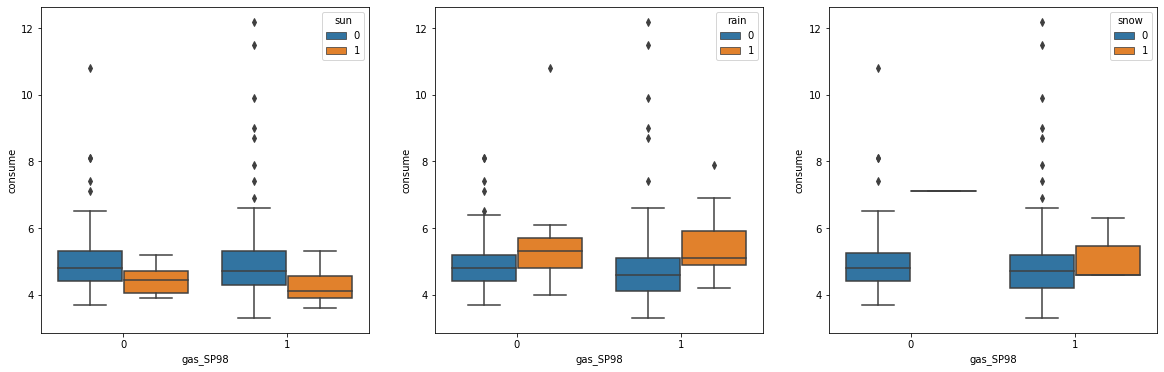

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(data=car, x='gas_SP98', y='consume', hue='sun', ax=ax1)
sns.boxplot(data=car, x='gas_SP98', y='consume', hue='rain', ax=ax2)
sns.boxplot(data=car, x='gas_SP98', y='consume', hue='snow', ax=ax3);

#### Sol

Como se puede comprobar en el gráfico, los consumos parecen ser más bajos cuando hace sol para ambas gasolinas; y se disparán cuando no hace sol.

El consumo medio es un poco más bajo con sol para la gasolina SP98, y aunque no es una diferencia enorme, si se hace ostensible en el precio de la gasolina, ya que de media por trayecto es 12 céntimos más barato iajar con SP95. 

Por otra parte sin sol, el consumo se dispara ostensiblemente, siendo prácticamente igual para ambas gasolinas. En este caso la diferencia en precio se hace aún más grande: casi 40 céntimos más barato de media viajar con SP95.

In [19]:
mean_consume(car, 'sun')

,sun on / SP95,sun on / SP95 price,sun on / SP98,sun on / SP98 price,sun off / SP95,sun off / SP95 price,sun off / SP98,sun off / SP98 price
0,4.42,6.11,4.26,6.23,4.97,6.86,4.96,7.24


Por tanto podemos afirmar que por lo general el sol hace que el consumo se reduzca.

#### Lluvia

Por el gráfico referente a la lluvia, parece que por lo general los consumos son más altos cuando el vehículo es movido con gasolina SP98, aunque parece que sin grandes variaciones entre un caso y otro.

In [20]:
mean_consume(car, 'rain')

,rain on / SP95,rain on / SP95 price,rain on / SP98,rain on / SP98 price,rain off / SP95,rain off / SP95 price,rain off / SP98,rain off / SP98 price
0,5.5,7.59,5.4,7.88,4.87,6.72,4.83,7.05


Sin embargo los consumos medios para todos los casos muestran una idea diferente: la lluvia tiende a disparar el consumo para ambos tipos de gasolina, aunque suele ser 0.1 litros más alto cuando el coche funciona con SP95 y 29 céntimos más barato de media. Sin lluvia, los consumos para ambas gasolinas tienen una diferencia muy similar, y en precio es 33 céntimos más barato viajar con SP35 para este caso.

#### Nieve

Realmente no es una variable bastante útil, pues tan sólo existen 4 trayectos con nieve, lo que por otro lado indica que en lugar por el cual se desplaza el coche no es muy común ver nevar.

La distribución en el gráfico es bastante parecida a la de la lluvia para los casos en los que no nieva, y algo diferente para los casos en los que sí nieva.

In [21]:
mean_consume(car, 'snow')

,snow on / SP95,snow on / SP95 price,snow on / SP98,snow on / SP98 price,snow off / SP95,snow off / SP95 price,snow off / SP98,snow off / SP98 price
0,7.1,9.8,5.17,7.54,4.92,6.79,4.9,7.15


Los consumos medios son bastante más altos para la gasolina SP95 cuando nieva en comparación con la SP98, y en este caso el precio medio también es más alto para la SP95. 

Por otro lado los consumos son algo más parecidos cuando no nieva, fenómeno que también se da en los precios. Pero como he puntualizado, tan sólo existen cuatro entradas con nieve.

### Conclusiones

Tras este análisis enfrentando a todas las variables independientes con la variable que presumiblemente querremos predecir, quedan algunas conclusiones:

 - Los consumos son más altos para la gasolina SP95, pero la diferencia en precio es de casi 0.35 céntimos más barata con respecto a la SP98.
 - Distancia, velocidad y temperatura exterior son variables que influyen en el consumo del vehículo de formas similares para ambos tipos de gasolina, aunque con una relación negativa algo difuminada.
 - El consumo tiende a dispararse más de lo normal en trayectos en los que temperatura, distancia y velocidad son bajas por lo general, y más especificamente si el aire acondicionado está activado. 
 - Los consumos se disparan cuando el aire acondicionado está encendido, siendo más altos cuando la gasolina utilizada es SP98. Sin embargo, cuando este se apaga, el consumo medio es más bajo con la gasolina SP98.
 - El consumo medio es un poco más bajo con sol para la gasolina SP98, aunque es 12 céntimos más rentable viajar con SP95 en este caso.
 - Sin sol, el consumo se dispara ostensiblemente, siendo prácticamente igual para ambas gasolinas. Sin embargo es casi 40 céntimos más barato de media viajar con SP95.
 - La lluvia tiende a disparar el consumo para ambos tipos de gasolina, aunque suele ser 0.1 litros más alto cuando el coche funciona con SP95 y 29 céntimos más barato de media. 
 - Sin lluvia, los consumos para ambas gasolinas tienen una diferencia muy similar, y en precio es 33 céntimos más barato viajar con SP35.
 - Cuando nieva los consumos medios son bastante más altos para la gasolina SP95, y en este caso el precio medio también es más alto para la SP95. 
 - Los consumos son algo más parecidos cuando no nieva, fenómeno que también se da en los precios.

## Correlaciones

Una vez analizado el comportamiento de cada variable con respecto al consumo, es hora de analizar el comportamiento de todas las variables entre sí.

### Matriz de Correlación

Antes de entrar en detalle, considero que hay ciertas variables que se pueden eliminar de antemano:
 - refill liters, refill gas y refill_spent: son columnas con datos registrados solo cuando el vehículo para a repostar, con lo cual tiene datos nulos que no se pueden rellenar con nada.
 - no_special: su valor es 1 cuando rain, sun y snow son 0, por lo tanto esas tres columnas ya contienen toda la información al respecto.

In [22]:
car.drop(['refill liters', 'refill gas', 'refill_spent', 'no_special'], axis=1, inplace=True)

Una vez eliminadas dichas variables, analizaré los datos, separándolos por tipo de gasolina:

#### SP95

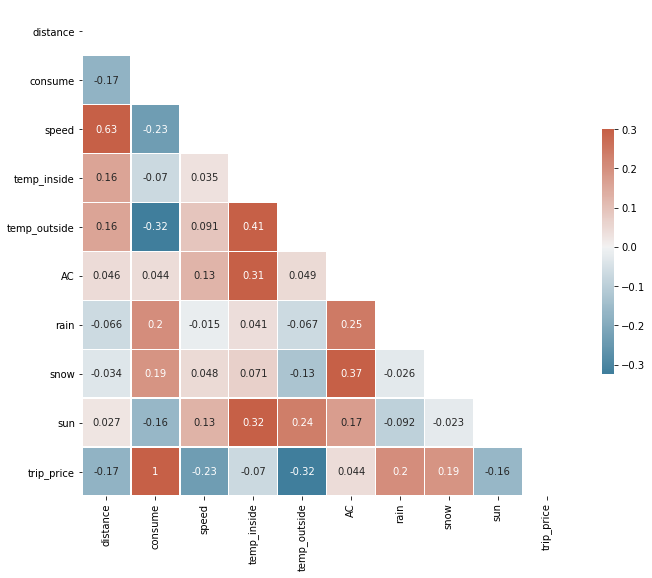

In [23]:
sp95 = car[car.gas_SP98 == 0]
correlation_graph(sp95);

#### SP98

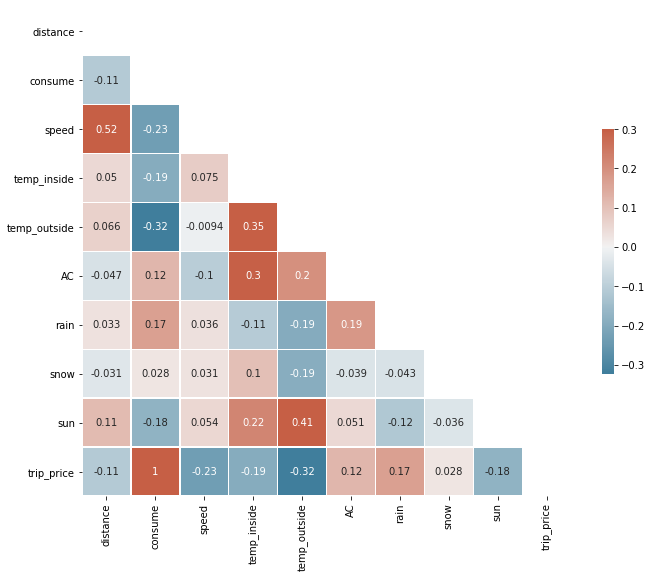

In [24]:
sp98 = car[car.gas_SP98 == 1]
correlation_graph(sp98);

Analizando aquellos casos especiales descubrimos que:

 - trip_price y consume: ambos casos poseen una correlación de 1, lo cual es lógico, pues a mayor consumo mayor precio se pagará por ese consumo.
 - speed y distance: con una correlación casi 10 puntos más alta en el caso la gasolina SP95. Significa que los viajes de mayor distancia suelen tener una velocidad media más alta, lo cual es razonable, ya que en un viaje larga se tiende a ir por vías rápidas y autopistas.
 - temp_outside y temp_inside: como he señalado más arriba, la temperatura dentro del coche varía positivamente con la temperatura de fuera, lo cual es razonable. Son correlaciones similares en ambos casos, aunque más alta en el caso de SP95.
 - sun y temp_outside: correlación más que razonable y evidente, en el caso de la gasolina SP35 es más baja, debido a la estacionalidad en el uso de las distintas gasolinas que señala el usuario del vehículo (SP98 para invierno, cuando el sol influye de manera más directa en la temperatura ambiente; SP95 el resto del año).
 - AC y temp_inside: como es lógico, a mayor temperatura dentro del coche más probable será que se utilice el aire acondicionado. Es calcada en ambos casos.
 - temp_outside y consume / temp_outside y trip_price: señalado igualmente más arriba, a menor temperatura exterior mayores serán el consumo y por tanto el precio medio del viaje. En ambos casos las correlaciones son exactamente iguales.
 
El resto de correlaciones son más bajas de 0.30, tanto positiva como negativamente, por lo tanto nada reseñables.

## Posible solución

Tras revisar el problema y los datos con los que contamos, considero que una posible forma de plantearlo es intentar construir un modelo de predicción de consumos para ambos tipos de gasolina. 

Al ser una compañía de taxis bajo demanda, en todo momento vamos a tener controlados datos como la distancia del trayecto, la velocidad media que ese trayecto tendrá, la temperatura exterior, si el trayecto se realizará con lluvia, sol o nada reseñable, y si nuestros conductores tendrán o no el aire acondicionado encendido.

Con estos datos, nuestros modelos podrán predecir qué consumo registrarían nuestros vehículos para cada situación específica con ambos tipos de gasolina, y de este modo tomar decisiones sobre qué tipo de gasolina utilizar dependiendo de la estación del año, el trayecto y demás. De este modo podríamos tener coches asignados para según qué tareas específicas y demás.

### Selección de variables

Al analizar las correlaciones hemos visto que algunas variables están altamente correlacionadas, por lo que podrían interferir en nuestro modelo. 

Voy a probar dos tipos de modelo: el primero eliminando la variables trip_price y temp_inside, y el segundo eliminando además sun, rain y snow. De esta forma compararé resultados y veré qué modelo predice mejor.

### Modelo 1 (sin trip_price y temp_inside)

#### SP98

In [25]:
sp98_1 = sp98.drop(['trip_price', 'temp_inside'], axis=1)

X98_1 = sp98_1.drop(['consume'], axis=1)
y98_1 = sp98_1.consume

In [26]:
from models import modeling

results = modeling(X98_1, y98_1)
results.sort_values(by=['RMSE'])

,model,R^2_score,RMSE
2,Random Forest Regressor,0.432875,0.643104
3,Support Vector Machine,0.418144,0.651403
5,Gradient Boost Regression,0.312836,0.707901
4,Ridge Regression,0.282310,0.723453
0,Linear Regression,0.281973,0.723623
1,Decission Tree,0.131940,0.795640


#### SP95

In [27]:
sp95_1 = sp95.drop(['trip_price', 'temp_inside'], axis=1)

X95_1 = sp95_1.drop(['consume'], axis=1)
y95_1 = sp95_1.consume

In [28]:
from models import modeling

results = modeling(X95_1, y95_1)
results.sort_values(by=['RMSE'])

,model,R^2_score,RMSE
2,Random Forest Regressor,0.505784,0.418103
5,Gradient Boost Regression,0.498875,0.421015
3,Support Vector Machine,0.187452,0.536104
4,Ridge Regression,0.133792,0.553522
0,Linear Regression,0.121867,0.557320
1,Decission Tree,0.082938,0.569539


### Modelo 2 (sin trip_price, temp_inside, sun, rain y snow)

#### SP98

In [29]:
sp98_2 = sp98.drop(['trip_price', 'temp_inside', 'sun', 'rain', 'snow'], axis=1)

X98_2 = sp98_2.drop(['consume'], axis=1)
y98_2 = sp98_2.consume

In [30]:
from models import modeling

results = modeling(X98_2, y98_2)
results.sort_values(by=['RMSE'])

,model,R^2_score,RMSE
2,Random Forest Regressor,0.444186,0.636659
3,Support Vector Machine,0.436600,0.640989
0,Linear Regression,0.264408,0.732420
4,Ridge Regression,0.262684,0.733278
5,Gradient Boost Regression,0.215051,0.756594
1,Decission Tree,0.109881,0.805686


#### SP95

In [31]:
sp95_2 = sp95.drop(['trip_price', 'temp_inside', 'sun', 'rain', 'snow'], axis=1)

X95_2 = sp95_2.drop(['consume'], axis=1)
y95_2 = sp95_2.consume

In [32]:
from models import modeling

results = modeling(X95_2, y95_2)
results.sort_values(by=['RMSE'])

,model,R^2_score,RMSE
5,Gradient Boost Regression,0.520856,0.411677
2,Random Forest Regressor,0.519902,0.412087
1,Decission Tree,0.218112,0.525892
3,Support Vector Machine,0.197694,0.532714
0,Linear Regression,0.017797,0.589420
4,Ridge Regression,0.014645,0.590365
